In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import datetime
from scipy.interpolate import CubicSpline

In [259]:
agot = datetime.datetime(1996, 8, 1)
acok = datetime.datetime(1998, 11, 16)
asos = datetime.datetime(2000, 8, 8)
affc = datetime.datetime(2005, 10, 17)
adwd = datetime.datetime(2011, 7, 12)
end = datetime.datetime(2022, 2, 18)
book_dates = [agot, acok, asos, affc, adwd]
delta = end - agot

In [260]:
x = []
y = []
books = 0
for i in range(delta.days + 1):
    day = agot + datetime.timedelta(days=i)
    if day in book_dates:
        books += 1
        print('new book written on ', day, 'after ', i, 'days following release of got')
        y.append(books)
        x.append(i)


x.append(i)
y.append(5)


new book written on  1996-08-01 00:00:00 after  0 days following release of got
new book written on  1998-11-16 00:00:00 after  837 days following release of got
new book written on  2000-08-08 00:00:00 after  1468 days following release of got
new book written on  2005-10-17 00:00:00 after  3364 days following release of got
new book written on  2011-07-12 00:00:00 after  5458 days following release of got


## Using natural cubic splines
Usually a safe bet.

In [261]:
cs = CubicSpline(x,y, bc_type = 'natural')

In [262]:
xs = np.linspace(0,15000, 1000)

In [263]:
pos_for_sixth = np.where([np.abs(val-6) < 0.005 for val in cs(xs)])[0][0]

In [264]:
agot + datetime.timedelta(days = xs[pos_for_sixth])

datetime.datetime(2036, 10, 29, 16, 47, 34, 54054)

In [265]:
cs(xs[pos_for_sixth])

array(5.99629675)

In [266]:
from sklearn.linear_model import RidgeCV

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
xs = np.array(xs).reshape(-1,1)

In [267]:
grid = {
    'alpha': [1e-1, 1, 10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7],
    'kernel': ['polynomial', 'linear'],
    'degree': [2,3,4,5]
}

In [268]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.kernel_ridge import KernelRidge
kRidge = KernelRidge()
gsearch = GridSearchCV(estimator = kRidge, param_grid = grid, n_jobs = -1,  cv = StratifiedKFold(n_splits = 2), verbose = 10)

In [269]:
gsearch.fit(x,y)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2; 1/72] START alpha=0.1, degree=2, kernel=polynomial.....................
[CV 1/2; 1/72] END alpha=0.1, degree=2, kernel=polynomial;, score=0.969 total time=   0.0s
[CV 2/2; 1/72] START alpha=0.1, degree=2, kernel=polynomial.....................
[CV 2/2; 1/72] END alpha=0.1, degree=2, kernel=polynomial;, score=-1.299 total time=   0.0s
[CV 1/2; 2/72] START alpha=0.1, degree=2, kernel=linear.........................
[CV 1/2; 2/72] END alpha=0.1, degree=2, kernel=linear;, score=0.013 total time=   0.0s
[CV 2/2; 2/72] START alpha=0.1, degree=2, kernel=linear.........................
[CV 1/2; 3/72] START alpha=0.1, degree=3, kernel=polynomial.....................
[CV 1/2; 3/72] END alpha=0.1, degree=3, kernel=polynomial;, score=0.542 total time=   0.0s
[CV 2/2; 3/72] START alpha=0.1, degree=3, kernel=polynomial.....................
[CV 2/2; 2/72] END alpha=0.1, degree=2, kernel=linear;, score=-3.274 total time=   0.0s
[CV

/Users/sangersteel/miniforge3/envs/toxic/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Users/sangersteel/miniforge3/envs/toxic/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=4.8257e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/Users/sangersteel/miniforge3/envs/toxic/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.2991e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/Users/sangersteel/miniforge3/envs/toxic/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=4.08153e-23): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/Users/s

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=KernelRidge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 100.0, 1000.0, 10000.0, 100000.0,
                                   1000000.0, 10000000.0],
                         'degree': [2, 3, 4, 5],
                         'kernel': ['polynomial', 'linear']},
             verbose=10)

In [270]:
best = gsearch.best_estimator_

In [271]:
best

KernelRidge(alpha=1000000.0, degree=2, kernel='polynomial')

In [272]:
best.fit(x,y)

KernelRidge(alpha=1000000.0, degree=2, kernel='polynomial')

In [273]:
y_kr = best.predict(xs)

In [274]:
rcv = RidgeCV(alphas=[1e-2, 1e-1, 1, 10, 100, 1000]).fit(x,y)

In [275]:
y_rcv = rcv.predict(xs)

In [276]:
pos_for_y_rcv = np.where([np.abs(val-6) < 0.005 for val in y_rcv])[0][0]
agot + datetime.timedelta(days = xs[pos_for_y_rcv][0])

datetime.datetime(2023, 8, 4, 20, 45, 24, 324324)

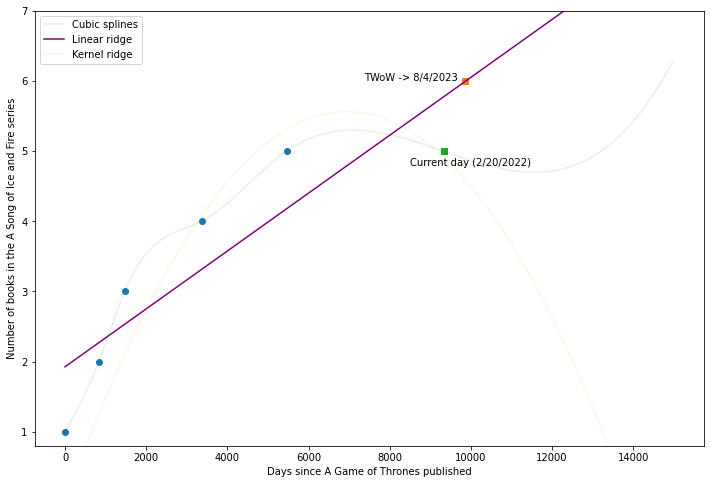

In [278]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(xs, cs(xs), color = 'green', alpha = 0.1)
ax.plot(xs, y_rcv, color = 'purple')
ax.plot(xs, y_kr, color = 'orange',alpha = 0.1)
plt.scatter(x, y)
plt.xlabel('Days since A Game of Thrones published')
plt.ylabel('Number of books in the A Song of Ice and Fire series')
plt.scatter(xs[pos_for_y_rcv], y_rcv[pos_for_y_rcv], marker = 's')
plt.scatter(x[-1],y[-1], marker = 's')
ax.annotate('Current day (2/20/2022)', xy = (x[-1],5), xytext = (8500, 4.8))
ax.annotate('TWoW -> 8/4/2023', xy = (xs[pos_for_y_rcv], 6), xytext = (xs[pos_for_y_rcv] - 2500,6))
ax.legend(['Cubic splines','Linear ridge', 'Kernel ridge'])
plt.ylim([0.8,7])
plt.savefig('results.jpg', bbox_inches = 'tight',  pad_inches = 0)